In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.inspection import permutation_importance

In [2]:
rows = []
with open("./results.txt", "r") as f:
    headers = f.readline()
    for l in f:
        rows.append(l.split(maxsplit=7, sep=","))

In [3]:
headers = ["image_path"] + headers.split(",") + ["predicted_class"]

In [4]:
measurements_df = pd.DataFrame(rows, columns=headers)

In [5]:
measurements_df.head()

,image_path,Exposures,AnalogueGains,Saturation,NoiseReductionModes,Brightness,Contrast'\n,predicted_class
0,image_coffe_cup/coffe_cpu_0.jpg,10000,0,0,0,0,0,n02815834 beaker\n
1,image_coffe_cup/coffe_cpu_1.jpg,10000,0,0,0,0,4,n02815834 beaker\n
2,image_coffe_cup/coffe_cpu_2.jpg,10000,0,0,0,0,32,n02815834 beaker\n
3,image_coffe_cup/coffe_cpu_3.jpg,10000,0,0,0,0.25,0,n02815834 beaker\n
4,image_coffe_cup/coffe_cpu_4.jpg,10000,0,0,0,0.25,4,n02815834 beaker\n


In [6]:
measurements_df["predicted_class"].unique(), measurements_df["predicted_class"].nunique() 

(array(['n02815834 beaker\n', 'n03937543 pill bottle\n',
        'n15075141 toilet tissue, toilet paper, bathroom tissue\n',
        'n04116512 rubber eraser, rubber, pencil eraser\n',
        'n04131690 saltshaker, salt shaker\n', 'n03291819 envelope\n'],
       dtype=object),
 6)

We have 6 classes

# Representative image from each class

In [8]:
# rep_images_df = measurements_df.groupby(by="predicted_class").first().reset_index(name="representative_image")
rep_images_df = measurements_df.groupby(by="predicted_class").first()

rep_images_df

,image_path,Exposures,AnalogueGains,Saturation,NoiseReductionModes,Brightness,Contrast'\n
predicted_class,,,,,,,
n02815834 beaker\n,image_coffe_cup/coffe_cpu_0.jpg,10000,0,0,0,0,0
n03291819 envelope\n,image_coffe_cup/coffe_cpu_708.jpg,999999,32,0.75,0,0.75,0
n03937543 pill bottle\n,image_coffe_cup/coffe_cpu_27.jpg,10000,0,0.25,0,0,0
"n04116512 rubber eraser, rubber, pencil eraser\n",image_coffe_cup/coffe_cpu_406.jpg,500000,32,0,0,0,4
"n04131690 saltshaker, salt shaker\n",image_coffe_cup/coffe_cpu_408.jpg,500000,32,0,0,0.25,0
"n15075141 toilet tissue, toilet paper, bathroom tissue\n",image_coffe_cup/coffe_cpu_405.jpg,500000,32,0,0,0,0


In [22]:
# pichanded selection pictures
image_path = "n04116512 rubber eraser, rubber, pencil eraser\n"

measurements_df.query("predicted_class==@image_path")

,image_path,Exposures,AnalogueGains,Saturation,NoiseReductionModes,Brightness,Contrast'\n,predicted_class
406,image_coffe_cup/coffe_cpu_406.jpg,500000,32,0,0,0,4,"n04116512 rubber eraser, rubber, pencil eraser\n"
407,image_coffe_cup/coffe_cpu_407.jpg,500000,32,0,0,0,32,"n04116512 rubber eraser, rubber, pencil eraser\n"
409,image_coffe_cup/coffe_cpu_409.jpg,500000,32,0,0,0.25,4,"n04116512 rubber eraser, rubber, pencil eraser\n"
410,image_coffe_cup/coffe_cpu_410.jpg,500000,32,0,0,0.25,32,"n04116512 rubber eraser, rubber, pencil eraser\n"
411,image_coffe_cup/coffe_cpu_411.jpg,500000,32,0,0,0.75,0,"n04116512 rubber eraser, rubber, pencil eraser\n"
...,...,...,...,...,...,...,...,...
720,image_coffe_cup/coffe_cpu_720.jpg,999999,32,0.75,4,0,0,"n04116512 rubber eraser, rubber, pencil eraser\n"
722,image_coffe_cup/coffe_cpu_722.jpg,999999,32,0.75,4,0,32,"n04116512 rubber eraser, rubber, pencil eraser\n"
724,image_coffe_cup/coffe_cpu_724.jpg,999999,32,0.75,4,0.25,4,"n04116512 rubber eraser, rubber, pencil eraser\n"
725,image_coffe_cup/coffe_cpu_725.jpg,999999,32,0.75,4,0.25,32,"n04116512 rubber eraser, rubber, pencil eraser\n"


In [21]:
# pick handed selection pictures
image_path = "image_coffe_cup/coffe_cpu_27.jpg"

measurements_df.query("image_path==@image_path")

,image_path,Exposures,AnalogueGains,Saturation,NoiseReductionModes,Brightness,Contrast'\n,predicted_class
27,image_coffe_cup/coffe_cpu_27.jpg,10000,0,0.25,0,0,0,n03937543 pill bottle\n


# Explore images from those classes

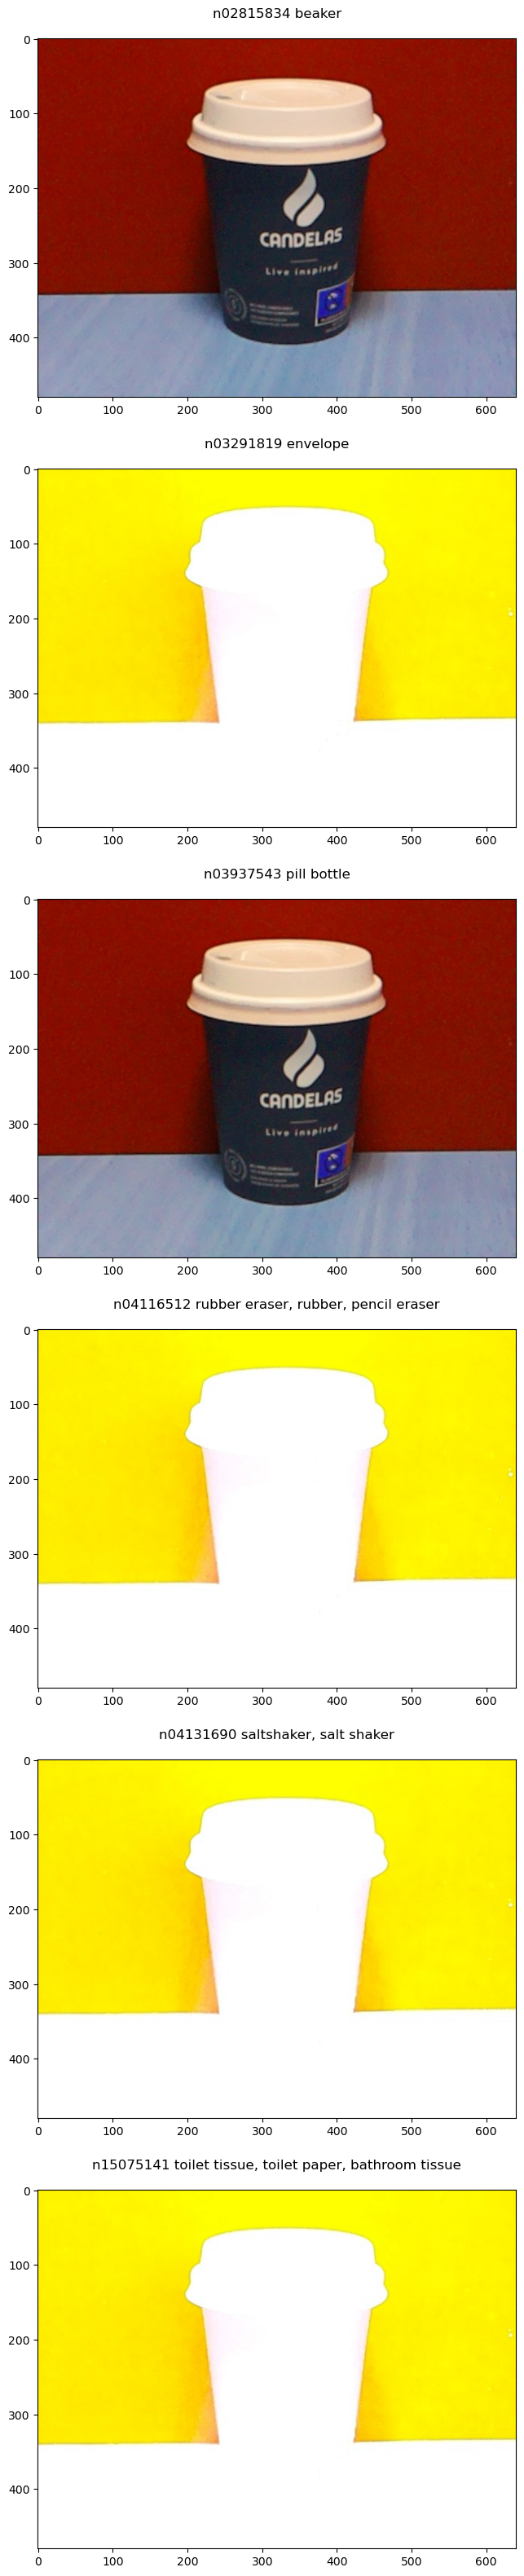

In [ ]:
_, ax = plt.subplots(6, 1, figsize=(25, 40))

for index, row in rep_images_df.iterrows():
    ax[index].set_title(row.predicted_class)
    ax[index].imshow(cv2.imread(row.representative_image))

# We could train a Knn to understand which are the most relevant to confuse the algorithm.

In [ ]:
X = measurements_df.to_numpy()[:, 1:-1].astype("float")

label_index = dict([(class_name, i) for i, class_name in enumerate(np.unique(measurements_df.predicted_class.to_numpy()))])

y = measurements_df.predicted_class.apply(lambda row: label_index[row]).to_numpy().astype("float")

X[:5], y[:5]

(array([[1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
        [1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 4.0e+00],
        [1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 3.2e+01],
        [1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 2.5e-01, 0.0e+00],
        [1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 2.5e-01, 4.0e+00]]),
 array([0., 0., 0., 0., 0.]))

In [ ]:
X.shape, y.shape

((729, 6), (729,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

def get_evaluation_data(X, y):
    loo = LeaveOneOut()

    y_predictions = []
    y_ground_truth = []

    for i, (train_index, test_index) in enumerate(loo.split(y)):
        knn = KNeighborsClassifier(n_neighbors=6)
        knn.fit(X[train_index], y[train_index])

        y_predictions.append(knn.predict(X[test_index]))
        y_ground_truth.append(y[test_index])

    print(f"iterations: ", i)

    return y_ground_truth, y_predictions

# Normalize data to keep it on the same scale

In [ ]:
mean, std = X.mean(), X.std()
X -= mean
X /= std

In [ ]:
y_ground_truth, y_preds = get_evaluation_data(X, y)

iterations:  728


# Evaluation

We do not count with a lot of data thus leave one out evaluation protocol seems adequate

In [ ]:
print("Train evaluation:")
print(classification_report(y_ground_truth, y_preds))

Train evaluation:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       544
         1.0       0.00      0.00      0.00         1
         2.0       0.08      0.02      0.04        41
         3.0       0.60      0.79      0.68        77
         4.0       0.29      0.21      0.24        29
         5.0       0.47      0.38      0.42        37

    accuracy                           0.86       729
   macro avg       0.40      0.40      0.39       729
weighted avg       0.82      0.86      0.83       729



/Users/matiasgonzalez/miniforge3/envs/fipa_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasgonzalez/miniforge3/envs/fipa_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasgonzalez/miniforge3/envs/fipa_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

``` We can predict with a f1-score of .86 which class the algorithm is going to predict based on the parameters we choose for the camera ```

In [ ]:
measurements_df.columns[1:-1]

Index(['Exposures', 'AnalogueGains', 'Saturation', 'NoiseReductionModes',
       'Brightness', 'Contrast'\n'],
      dtype='object')

In [ ]:
km = KNeighborsClassifier(n_neighbors=6)
km.fit(X, y)

model_fi = permutation_importance(km, X, y)

parameters_weight = np.array([round(value, 2) for value in model_fi["importances_mean"]])

parameters_weight/parameters_weight.sum()

array([ 0.3255814 ,  0.55813953, -0.        ,  0.06976744,  0.        ,
        0.04651163])

``` It seems that Exposures and AnalogueGains are the most important when confusing the algorithm ```

- Exposure -> 0.15
- AnalogueGains -> 0.24
- Saturation -> have no impact in the classification
- NoiseReductionModes -> 0.02
- Brightness -> have no impact which seems weird
- Contrast -> 0.02